# MODULE 9 - COMPUTER VISION PROJECT 2

# PART A

#### DOMAIN: 
Entertainment

#### CONTEXT: 

Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. 
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. 
Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene.The data labelling is already done. Since there higher time complexity is involved in the 

#### DATA DESCRIPTION: 

The dataset comprises of images and its mask for corresponding human face.

#### PROJECT OBJECTIVE: 

To build a face detection system.

## 1. Import and Understand the data 

### A. Import and read ‘images.npy’. 

### B. Split the data into Features(X) & labels(Y). Unify shape of all the images. 


### C. Split the data into train and test.

### D. Select random image from the train data and display original image and masked image. 

In [1]:
# The neccesary libraries are imported here:

import os
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

In [3]:
# The "images.npy" file is loaded onto a variable "data".

data = np.load('C:\\Users\\ASUS\\images.npy', allow_pickle=True)

In [4]:
# Check one sample from the loaded "images.npy" file


X = data[1,0]
X.shape
print(data.shape,X.shape)

(409, 2) (697, 1280, 4)


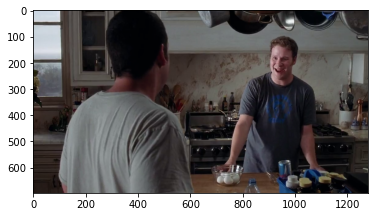

In [5]:
from matplotlib import pyplot as plt
plt.imshow(X)
plt.show()

In [6]:
# Checking sample data
data[10][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}],
  'imageWidth': 600,
  'imageHeight': 337}]

In [12]:
data[10][0]

array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [6, 6, 6]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [6, 6, 6]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]], dtype=uint8)

### Set image dimensions:


##### Initialize image height, image width with value: 28

In [14]:
# Setting image dimension
IMAGE_SIZE = 224
HEIGHT_CELLS = 28
WIDTH_CELLS = 28
#Defining transfer learning model
BACKBONE = "resnet34"

In [15]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.2.1
!pip install -q keras==2.5
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.2.1


Segmentation Models: using `tf.keras` framework.


ERROR: Could not find a version that satisfies the requirement keras==2.5 (from versions: 0.2.0, 0.3.0, 0.3.1, 0.3.2, 0.3.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.8, 1.1.0, 1.1.1, 1.1.2, 1.2.0, 1.2.1, 1.2.2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.0.6, 2.0.7, 2.0.8, 2.0.9, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.1.5, 2.1.6, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.2.4, 2.2.5, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0rc3, 2.6.0, 2.7.0rc0, 2.7.0rc2, 2.7.0, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.10.0rc0, 2.10.0rc1, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0rc3, 2.11.0, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for keras==2.5


In [16]:
from segmentation_models import Unet,get_preprocessing


### Create features and labels:

- Here feature is the image.

- The label is the mask.

- Images will be stored in "X_train" array.

- Masks will be stored in "masks" array.

In [17]:
y = np.zeros((int(data.shape[0]), 28, 28), dtype=np.float32)
X = np.zeros((int(data.shape[0]), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
# Preprocessing data according to the chosen transfer learning model
preprocess_input_img = get_preprocessing(BACKBONE)

for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_CUBIC)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input_img(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * 28)
        x2 = int(i["points"][1]['x'] * 28)
        y1 = int(i["points"][0]['y'] * 28)
        y2 = int(i["points"][1]['y'] * 28)
        y[index][y1:y2, x1:x2] = 1

In [18]:
# Training and Masking data shape 
print("Features/Image data shape: ", X.shape)
print("Masking/Labels data shape:", y.shape)

Features/Image data shape:  (409, 224, 224, 3)
Masking/Labels data shape: (409, 28, 28)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 67.  61.  97.]
  [ 78.  72. 108.]
  [ 83.  77. 113.]
  ...
  [253. 122.  94.]
  [255. 121.  92.]
  [255. 121.  92.]]

 [[ 75.  69. 103.]
  [ 81.  75. 109.]
  [ 82.  76. 110.]
  ...
  [254. 119.  92.]
  [255. 119.  91.]
  [255. 119.  89.]]

 [[ 81.  75. 109.]
  [ 83.  77. 111.]
  [ 84.  78. 112.]
  ...
  [254. 118.  88.]
  [255. 119.  87.]
  [255. 118.  86.]]

 ...

 [[ 39.   5.   0.]
  [ 41.   6.   1.]
  [ 42.   7.   1.]
  ...
  [ 45.  43.  34.]
  [ 46.  47.  39.]
  [ 49.  50.  44.]]

 [[ 44.   8.   0.]
  [ 46.  10.   1.]
  [ 47.  11.   3.]
  ...
  [ 50.  42.  39.]
  [ 48.  43.  40.]
  [ 48.  43.  40.]]

 [[ 45.  10.   1.]
  [ 46.  10.   2.]
  [ 47.  11.   3.]
  ...
  [ 49.  42.  37.]
  [ 47.  42.  38.]
  [ 46.  43.  38.]]]



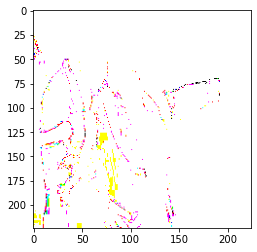

In [19]:
# Displaying image value and visual
n=56
print(X[n])
print()
plt.imshow(X[n])

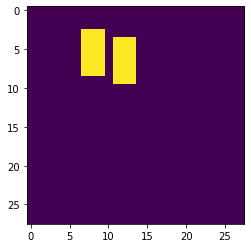

In [20]:
plt.imshow(y[n])

## Dataset split in ratio of 400:9

### Print the shape of X_train and X_test

In [22]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)
print("Training data shape: ", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape:  (400, 224, 224, 3)
Testing data shape: (9, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[180. 117.  64.]
  [180. 118.  62.]
  [179. 117.  61.]
  ...
  [177. 103.  50.]
  [174. 101.  48.]
  [174. 102.  49.]]

 [[182. 119.  64.]
  [181. 119.  62.]
  [179. 117.  61.]
  ...
  [177. 104.  49.]
  [176. 104.  48.]
  [176. 103.  49.]]

 [[182. 119.  63.]
  [182. 119.  63.]
  [183. 120.  63.]
  ...
  [180. 109.  52.]
  [179. 106.  50.]
  [179. 106.  51.]]

 ...

 [[166. 132. 112.]
  [162. 124. 104.]
  [126.  98.  82.]
  ...
  [136. 142. 103.]
  [135. 141. 100.]
  [138. 142. 101.]]

 [[166. 125. 102.]
  [162. 122. 102.]
  [135. 106.  92.]
  ...
  [134. 142. 101.]
  [131. 138.  97.]
  [137. 141. 100.]]

 [[160. 117.  95.]
  [162. 120.  99.]
  [143. 114. 100.]
  ...
  [134. 140.  97.]
  [131. 137.  95.]
  [140. 144. 103.]]]


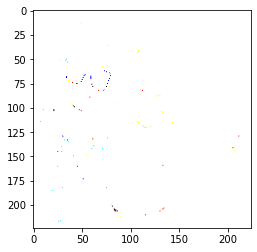

In [23]:
# Image at index 3 is masked now, its original and masked image is displayed.


from matplotlib import pyplot
n = 3
print(X_train[n])
pyplot.imshow(X_train[n])

## 2. Model building:

### A. Design a face mask detection model. 

### B. Design your own Dice Coefficient and Loss function.

### C. Train and tune the model as required.

### D. Evaluate and share insights on performance of the model.

### Add MobileNet as model with below parameter values

- input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3

- include_top: False

- alpha: 1.0

- weights: "imagenet"

### Add UNET architecture layers

- This is the trickiest part of the project, you need to research and implement it correctly

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [25]:
# Randomly shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

In [26]:
from tensorflow.keras.layers import Input, Concatenate, UpSampling2D, Conv2D, Reshape, BatchNormalization
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import clear_session, log, epsilon
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [36]:
base_model = Unet(backbone_name='resnet34', encoder_weights='imagenet')
input_base_model = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
l1 = Conv2D(3, (1, 1))(input_base_model)
out = base_model(l1)
x1 = Conv2D(10, kernel_size =3,strides=2,padding = "same", activation="relu")(out)

x2= Conv2D(10, kernel_size=3,strides=2,padding = "same", activation="relu")(x1)

x3 = Conv2D(10, kernel_size=3,strides=2,padding = "same", activation="relu")(x2)
x4 = Conv2D(1, kernel_size=2,strides=2,padding = "same", activation="relu")(x3)

x5 = UpSampling2D()(x4)
x_out = Reshape((28,28))(x5)
model = Model(input_base_model, x_out, name=base_model.name)

In [37]:
#Dice Coefficient Function
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

In [38]:
#Loss Function
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

Complie the model using below parameters:

- loss: use the loss function defined above

- optimizers: use Adam optimizer

- metrics: use dice_coefficient function defined above

In [39]:
#Compiling Model
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

In [40]:
checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, mode="min")
stop = EarlyStopping(monitor="val_loss", patience=7, mode="min")

### Fit the model using below parameters:

epochs:10 

batch_size: 1

callbacks: checkpoint, reduce_lr, stop

In [41]:
#Training model
model.fit(X_train,y_train,batch_size=1,epochs=10,validation_data=(X_test, y_test), callbacks=[checkpoint,stop])

Epoch 1/10
400/400 [==============================] - ETA: 0s - loss: 1.7395 - dice_coefficient: 0.3418
Epoch 1: val_loss improved from inf to 3.91377, saving model to model-3.91.h5
400/400 [==============================] - 273s 650ms/step - loss: 1.7395 - dice_coefficient: 0.3418 - val_loss: 3.9138 - val_dice_coefficient: 0.5018
Epoch 2/10
400/400 [==============================] - ETA: 0s - loss: 1.7905 - dice_coefficient: 0.3854
Epoch 2: val_loss improved from 3.91377 to 2.86959, saving model to model-2.87.h5
400/400 [==============================] - 248s 620ms/step - loss: 1.7905 - dice_coefficient: 0.3854 - val_loss: 2.8696 - val_dice_coefficient: 0.3652
Epoch 3/10
400/400 [==============================] - ETA: 0s - loss: 2.0391 - dice_coefficient: 0.3361
Epoch 3: val_loss improved from 2.86959 to 1.90902, saving model to model-1.91.h5
400/400 [==============================] - 256s 640ms/step - loss: 2.0391 - dice_coefficient: 0.3361 - val_loss: 1.9090 - val_dice_coefficient: 

In [42]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 0.8890 - dice_coefficient: 1.0741


[0.889012336730957, 1.0741294622421265]

## 3. Test the model predictions on the test image: ‘image with index 3 in the test data’ and visualise the predicted masks on the faces in the image

In [57]:
n = 3
x=np.array(X_test[n])
x=np.expand_dims(x, axis=0)
predict = model.predict(x, verbose=1)

1/1 [==============================] - 0s 115ms/step


In [58]:
print(predict.shape, predict.min(), predict.max(), predict.mean())

(1, 28, 28) 0.0 43.516396 1.2385652


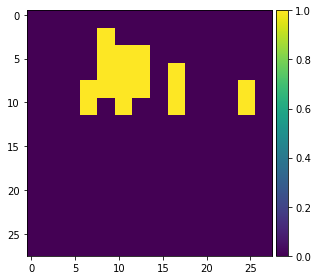

In [64]:
from skimage.io import imread, imshow


predict = (predict > 0.5).astype(np.uint8)
imshow(np.squeeze(predict[0]))
plt.show()



# CV PROJECT2_PARTA IS OVER

# PART B

## Part - B
**• DOMAIN:** Entertainment

**• CONTEXT:** Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription
basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on
the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer
vision and multimedia experts who need to detect faces from screen shots from the movie scene.
The data labelling is already done. Since there higher time complexity is involved in the

**• DATA DESCRIPTION:** The dataset comprises of face images.

**• PROJECT OBJECTIVE:** To create an image dataset to be used by AI team build an image classifier data. Profile images of people are given.

## Steps and tasks:

### 1. Read/import images from folder ‘training_images’.

### 2. Write a loop which will iterate through all the images in the ‘training_images’ folder and detect the faces present on all the images.

Hint: You can use ’haarcascade_frontalface_default.xml’ from internet to detect faces which is available open source.

### 3. From the same loop above, extract metadata of the faces and write into a DataFrame.

### 4. Save the output Dataframe in .csv format.

In [92]:
#Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, MaxPooling2D, MaxPool2D, GlobalMaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from glob import glob
import cv2
from collections import Counter
from sklearn.model_selection import train_test_split

In [93]:
project_path = 'C:\\Users\\ASUS\\training_images-20211126T092819Z-001.zip'

In [94]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [95]:
import cv2
import os

In [96]:
from zipfile import ZipFile
with ZipFile(project_path,'r') as zip:
  zip.extractall()

In [97]:
import numpy as np
import pandas as pd
import tensorflow
tensorflow.__version__

'2.11.0'

In [98]:
# Setting image dimension
IMAGE_SIZE = 224
HEIGHT_CELLS = 28
WIDTH_CELLS = 28
#Defining transfer learning model
BACKBONE = "resnet34"

In [99]:
import os
import cv2
im_path = 'C:\\Users\\ASUS\\training_images'

In [101]:
images = []
for filename in os.listdir(im_path):
    img = cv2.imread(os.path.join(im_path, filename))
    if img is not None:
        images.append(img)

In [110]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [111]:
face_data = []

for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.4, 5)
    
      # Append the face data to the list
    for (x,y,w,h) in faces:
        face_data.append([x, y, w, h, len(faces), filename])

In [112]:
df = pd.DataFrame(face_data, columns=["x", "y", "w", "h", "Total_faces", "Image_Name"])
df.head()

,x,y,w,h,Total_faces,Image_Name
0,25,123,354,354,1,real_01081.jpg
1,138,176,354,354,1,real_01081.jpg
2,59,52,496,496,1,real_01081.jpg
3,296,241,181,181,2,real_01081.jpg
4,258,209,253,253,2,real_01081.jpg


In [114]:
# Dataframe to csv file
df.to_csv('C:\\Users\\ASUS\\new_data.csv', index=False)

## The images are converted into dataframe and that frame is converted into .csv file - name of the csv file is:

new_data.csv

# PART B is over